In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

In [2]:
data=pd.read_csv('pima-indians-diabetes.csv')
data.head()


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
604,4,183,0,0,0,28.4,0.212,36,1
462,8,74,70,40,49,35.3,0.705,39,0
310,6,80,66,30,0,26.2,0.313,41,0
322,0,124,70,20,0,27.4,0.254,36,1
534,1,77,56,30,56,33.3,1.251,24,0
544,1,88,78,29,76,32.0,0.365,29,0
130,4,173,70,14,168,29.7,0.361,33,1
71,5,139,64,35,140,28.6,0.411,26,0
38,2,90,68,42,0,38.2,0.503,27,1
533,6,91,0,0,0,29.8,0.501,31,0


In [7]:
data.shape


(768, 9)

In [8]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
data['class']=data["class"].astype("category")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Preg    768 non-null    int64   
 1   Plas    768 non-null    int64   
 2   Pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   test    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [11]:
data.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [47]:
for i in data.iloc[:,:-1].columns:
    print(i," ;",sum(data[i]=="a"))

Preg  ; 0
Plas  ; 0
Pres  ; 0
skin  ; 0
test  ; 0
mass  ; 0
pedi  ; 0
age  ; 0


In [18]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Preg,768.0,NaN,NaN,NaN,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,NaN,NaN,NaN,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,NaN,NaN,NaN,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,NaN,NaN,NaN,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,NaN,NaN,NaN,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,NaN,NaN,NaN,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,NaN,NaN,NaN,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,NaN,NaN,NaN,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,2.0,0.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.corr().style.background_gradient('coolwarm')

,Preg,Plas,Pres,skin,test,mass,pedi,age
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


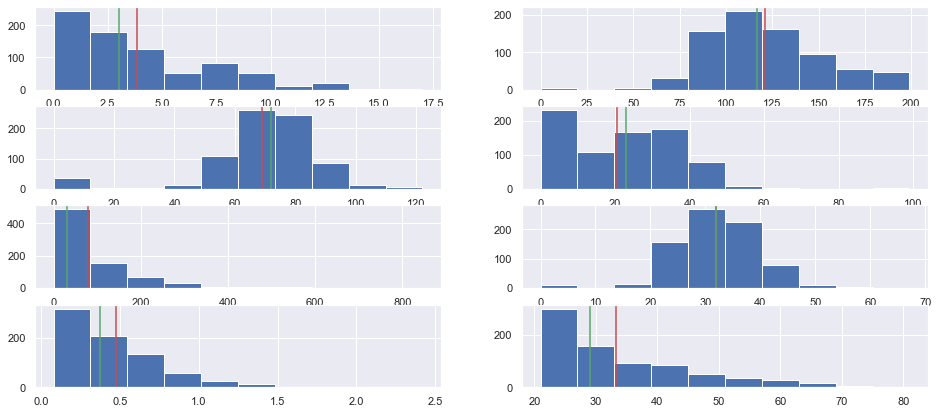

In [26]:
sns.set(rc={'figure.figsize':(16,7)})
for i,var in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(4,2,1+i)
    plt.hist(data[var])
    plt.axvline(data[var].mean(),color="r")
    plt.axvline(data[var].median(),color="g")

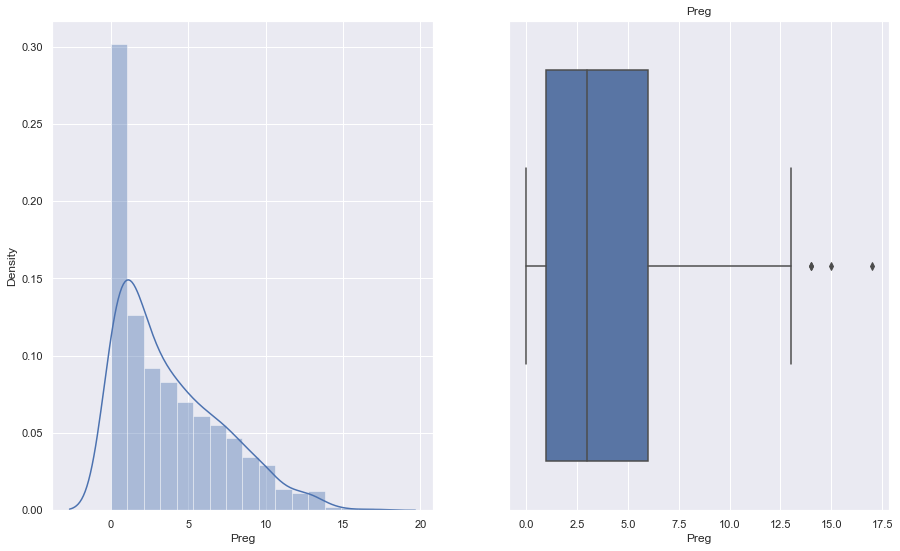

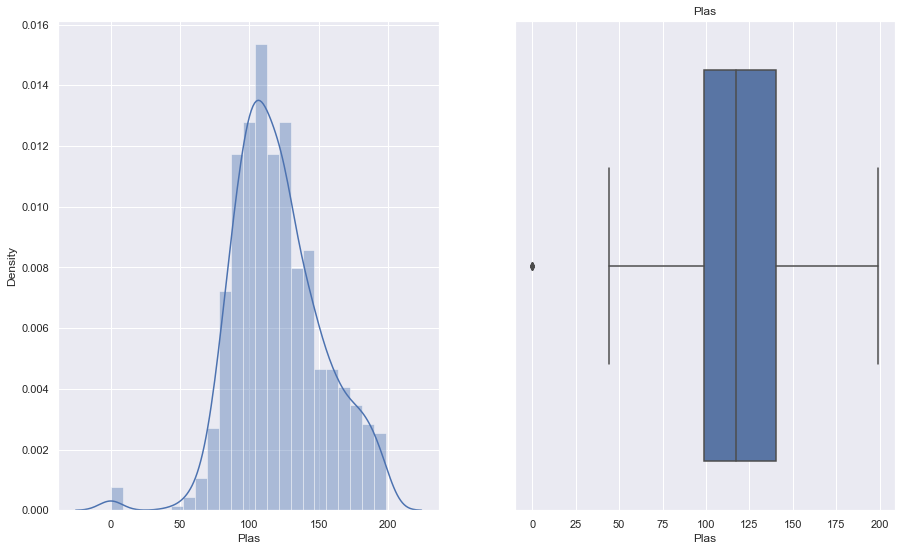

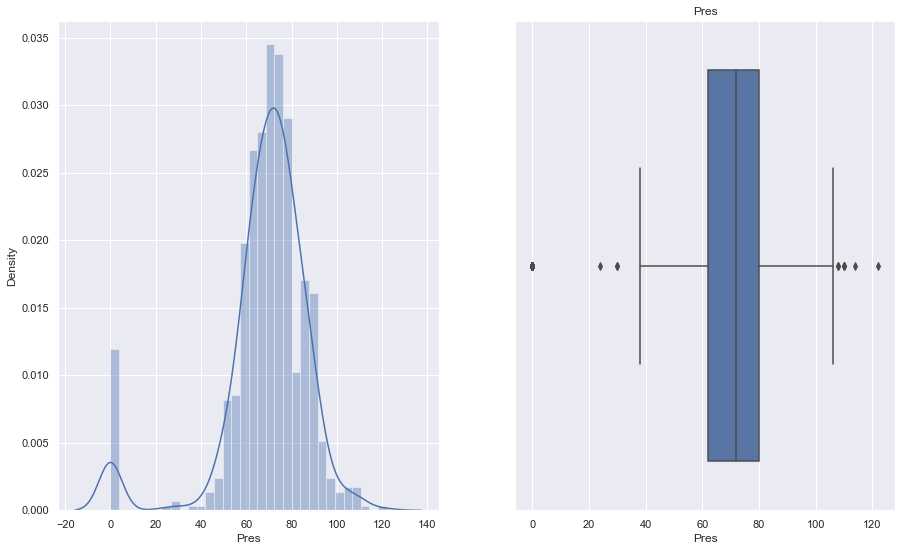

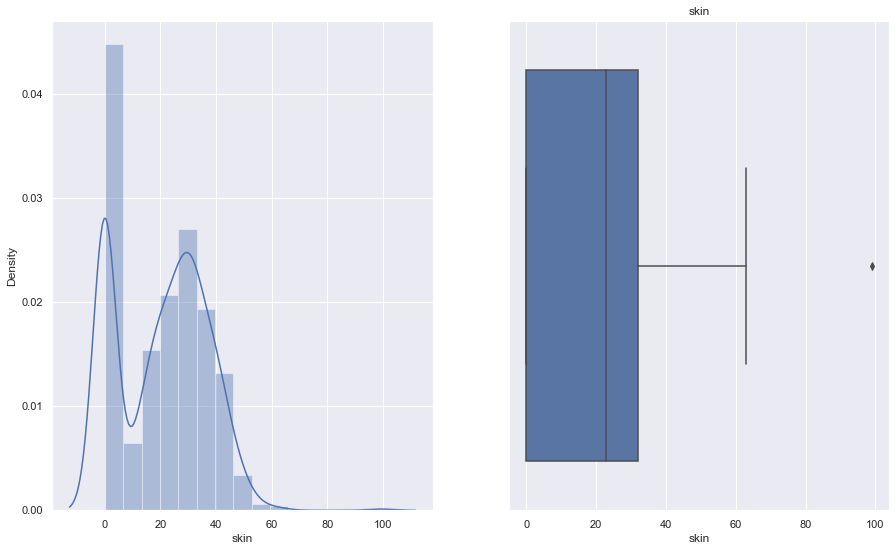

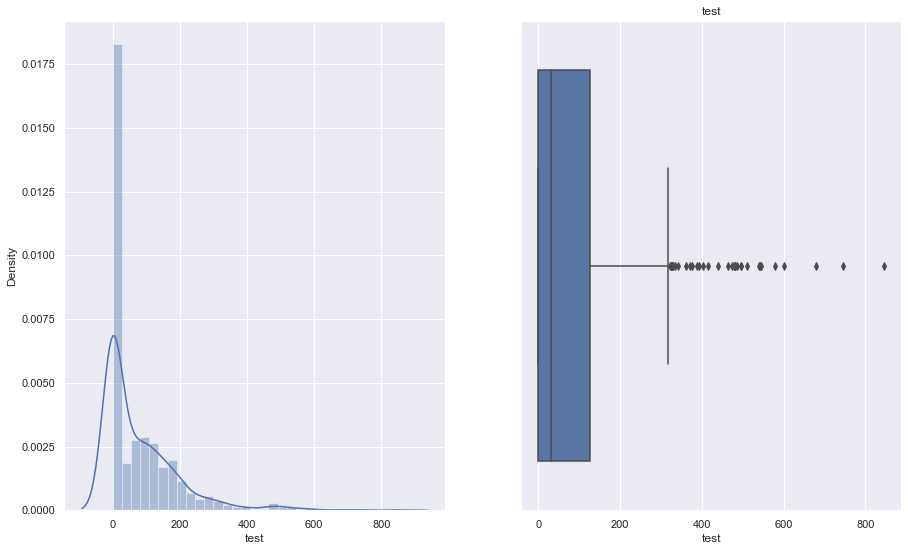

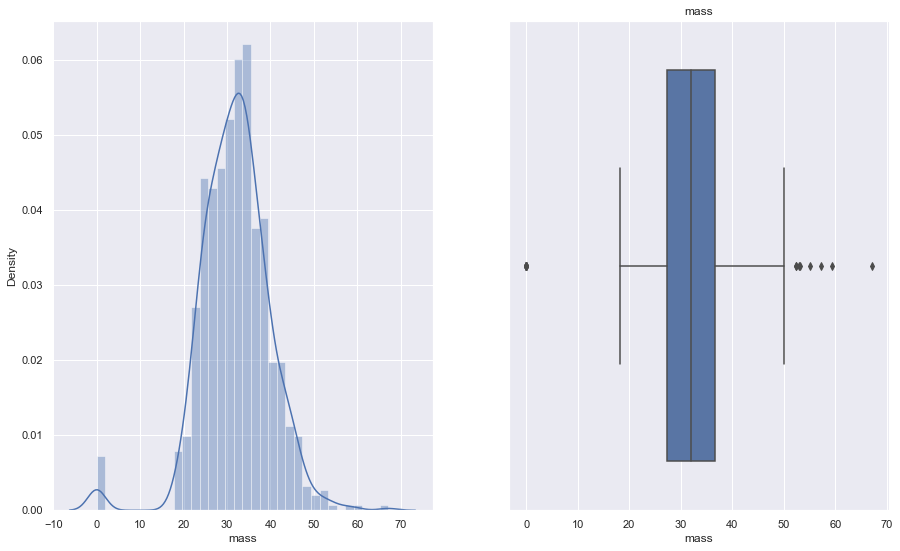

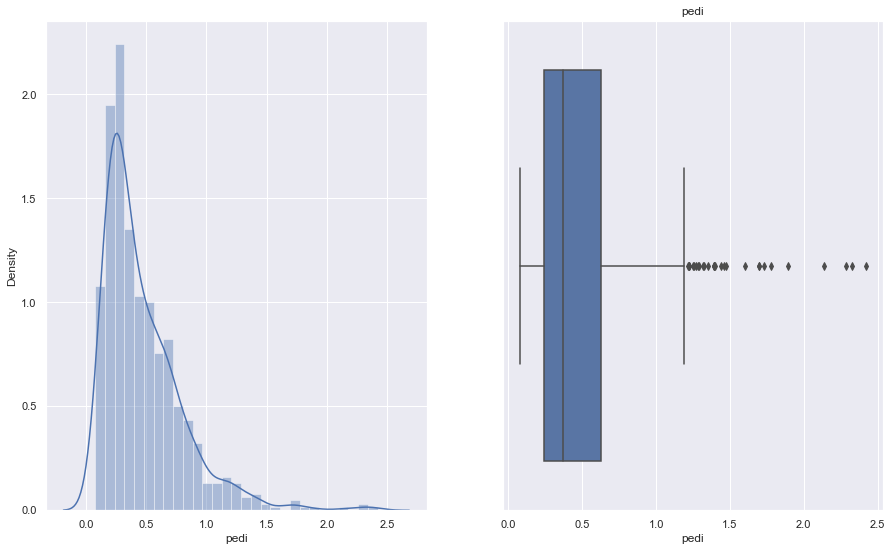

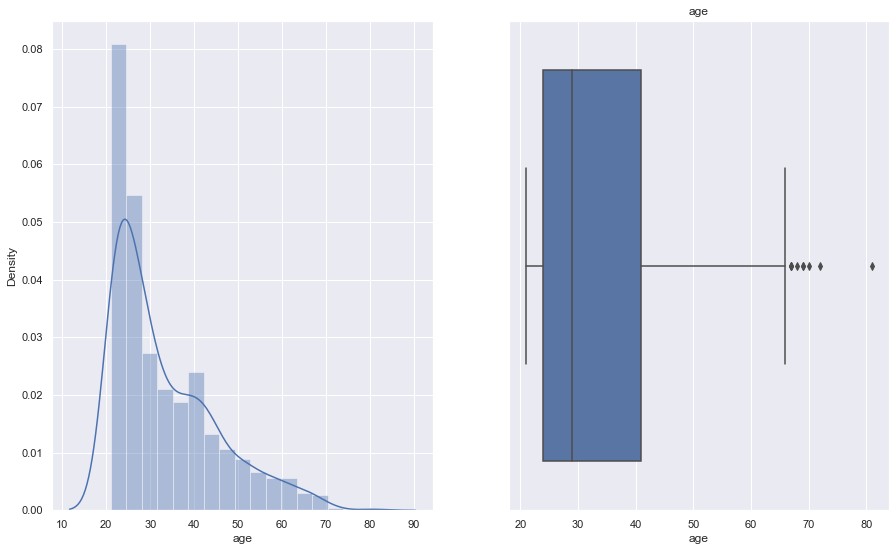

In [29]:
import warnings
warnings.filterwarnings('ignore')
for i,var in enumerate(data.iloc[:,:-1].columns):
    fig,ax=plt.subplots(1,2,figsize=(15,9))
    plt.title(var)
    sns.distplot(data[var],ax=ax[0])
    sns.boxplot(data[var],ax=ax[1])

<AxesSubplot:>

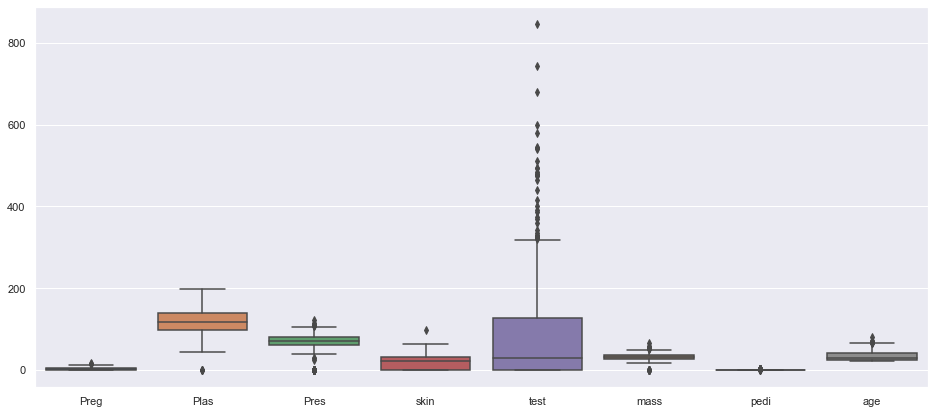

In [31]:
sns.boxplot(data=data.iloc[:,:-1])

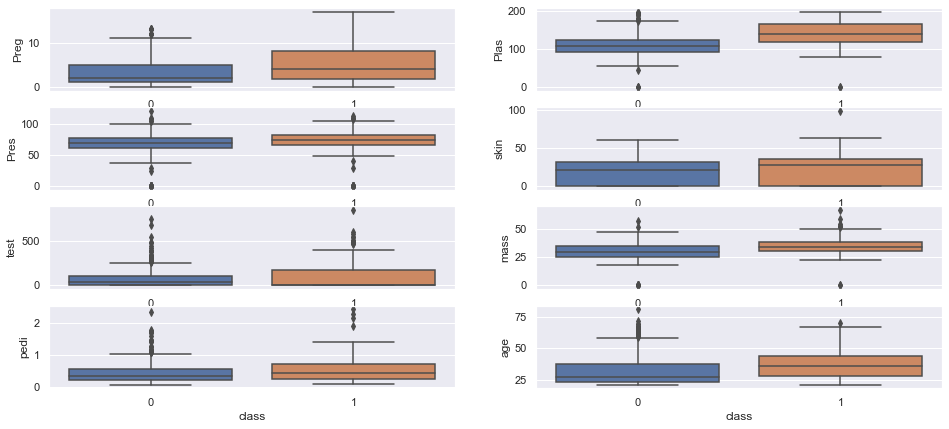

In [35]:
for i,var in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(4,2,1+i)
    sns.boxplot(data['class'],data[var])

In [42]:
var=data.iloc[:,:-1].columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])

# Feature importance

In [53]:
from statsmodels.stats.weightstats  import ztest
for i in data.iloc[:,:-1]:
    x=data[data['class']==1][i]
    y=data[data['class']==0][i]
    stats ,pval=ztest(x,y)
    if pval<0.05:
        print("P value for {} is {}  therefore Reject the Null ".format(i,pval))
    else:
        print("P value for {} is {}  therefore Fail to reject the Null ".format(i,pval))

P value for Preg is 3.0067438568293913e-10  therefore Reject the Null 
P value for Plas is 2.8059829290895864e-48  therefore Reject the Null 
P value for Pres is 0.0711212794568701  therefore Fail to reject the Null 
P value for skin is 0.038014329176300016  therefore Reject the Null 
P value for test is 0.0002680940725662326  therefore Reject the Null 
P value for mass is 2.4154687820297448e-17  therefore Reject the Null 
P value for pedi is 1.029958892279755e-06  therefore Reject the Null 
P value for age is 1.1006318936217302e-11  therefore Reject the Null 


In [54]:
data.drop('Pres',axis=1,inplace=True)

<AxesSubplot:ylabel='class'>

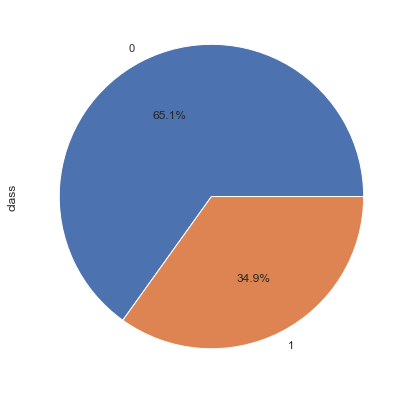

In [58]:
data['class'].value_counts().plot(kind='pie',autopct="%1.1f%%")

In [60]:
y=data[['class']]
x=data.iloc[:,:-1]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
print('Train score: ',tree.score(x_train,y_train))
print('Test score: ',tree.score(x_test,y_test))

Train score:  1.0
Test score:  0.696969696969697


In [72]:
tree=DecisionTreeClassifier( criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=4,)
tree.fit(x_train,y_train)
print('Train score: ',tree.score(x_train,y_train))
print('Test score: ',tree.score(x_test,y_test))

Train score:  0.7635009310986964
Test score:  0.7575757575757576


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
sm=SMOTE()
X_train,Y_train=sm.fit_resample(x_train,y_train)

In [97]:
tree=DecisionTreeClassifier( criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,)
tree.fit(X_train,Y_train)
print('Train score: ',tree.score(X_train,Y_train))
print('Test score: ',tree.score(x_test,y_test))

Train score:  0.8305084745762712
Test score:  0.7748917748917749


In [103]:
feature=pd.DataFrame(tree.feature_importances_,index=x_train.columns)
feature.sort_values(0,ascending=False)

,0
Plas,0.455731
mass,0.265444
age,0.197272
test,0.065054
Preg,0.009781
pedi,0.004163
skin,0.002555


<AxesSubplot:>

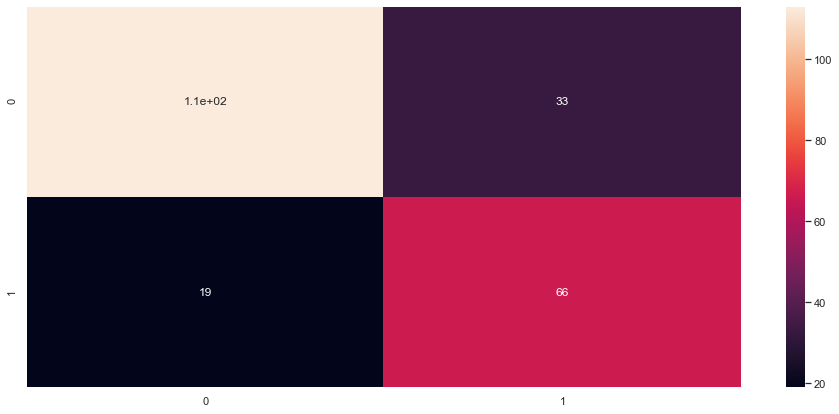

In [109]:
from sklearn import metrics
yhat=tree.predict(x_test)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test,yhat)),annot=True)

In [111]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       146
           1       0.67      0.78      0.72        85

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.77       231
weighted avg       0.79      0.77      0.78       231



In [112]:
metrics.accuracy_score(y_test,yhat)

0.7748917748917749